### 【問題1】データセットの取得
```
pd.read_csv()を使用して、変数に格納してください。
```

In [16]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_info_rows', 6)

df_base = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
df_test = df_base
# y = df_base.loc[:, ["SalePrice"]]
y = df_base["SalePrice"]

### 【問題2】データセット自体の調査
```
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。
```

```
SalePrice: プロパティのドルでの販売価格。 これは、予測しようとしているターゲット変数です。
MSSubClass：建物クラス
MSZoning： 一般的なゾーニング分類
LotFrontage：プロパティに接続された通りの線形フィート
LotArea：平方フィート単位のロットサイズ
Street：道路アクセスのタイプ
Alley：路地へのアクセスの種類
LotShape：プロパティの一般的な形状
LandContour：プロパティの平坦度
ユーティリティ：利用可能なユーティリティの種類
LotConfig：ロット構成
LandSlope：プロパティの勾配
Neighborhood：エイムズ市域内の物理的な場所
Condition1：幹線道路または鉄道への近さ
Condition2：幹線道路または鉄道への近接性（秒が存在する場合）
...
```

### 【問題3】データの確認
```
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

各特徴量がどういったものかを見る。（数値データか文字データなど）
今回の目的変数はどの列か確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。
```

In [17]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
display(df_test.info())
display(df_test.describe())
display(df_test.isnull())
display(df_test.sum())

# 今回の目的変数はどの列か確認する。
# Answer: SalePrice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Id             int64  
 1   MSSubClass     int64  
 2   MSZoning       object 
 3   LotFrontage    float64
 4   LotArea        int64  
 5   Street         object 
 6   Alley          object 
 7   LotShape       object 
 8   LandContour    object 
 9   Utilities      object 
 10  LotConfig      object 
 11  LandSlope      object 
 12  Neighborhood   object 
 13  Condition1     object 
 14  Condition2     object 
 15  BldgType       object 
 16  HouseStyle     object 
 17  OverallQual    int64  
 18  OverallCond    int64  
 19  YearBuilt      int64  
 20  YearRemodAdd   int64  
 21  RoofStyle      object 
 22  RoofMatl       object 
 23  Exterior1st    object 
 24  Exterior2nd    object 
 25  MasVnrType     object 
 26  MasVnrArea     float64
 27  ExterQual      object 
 28  ExterCond      object 
 29  Foundation     objec

None

,Id,MSSubClass,LotFrontage,...,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,...,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,...,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,...,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,...,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,...,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,...,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,...,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,...,12.000000,2010.000000,755000.000000


,Id,MSSubClass,MSZoning,...,SaleType,SaleCondition,SalePrice
0,False,False,False,...,False,False,False
1,False,False,False,...,False,False,False
2,False,False,False,...,False,False,False
3,False,False,False,...,False,False,False
4,False,False,False,...,False,False,False
...,...,...,...,...,...,...,...
1455,False,False,False,...,False,False,False
1456,False,False,False,...,False,False,False
1457,False,False,False,...,False,False,False
1458,False,False,False,...,False,False,False


Id                                                         1066530
MSSubClass                                                   83070
MSZoning         RLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRMRL...
LotFrontage                                                  84130
LotArea                                                   15354569
                                       ...                        
MoSold                                                        9230
YrSold                                                     2931411
SaleType         WDWDWDWDWDWDWDWDWDWDWDNewWDNewWDWDWDWDWDCODNew...
SaleCondition    NormalNormalNormalAbnormlNormalNormalNormalNor...
SalePrice                                                264144946
Length: 65, dtype: object

### 【問題4】欠損値への対応
```
欠損値に関して以下のことを行い、レポートしてください。
各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。
このライブラリにより欠損値の有無が可視化できます。
インストールや使い方に関しては以下のページをご覧ください。

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
```

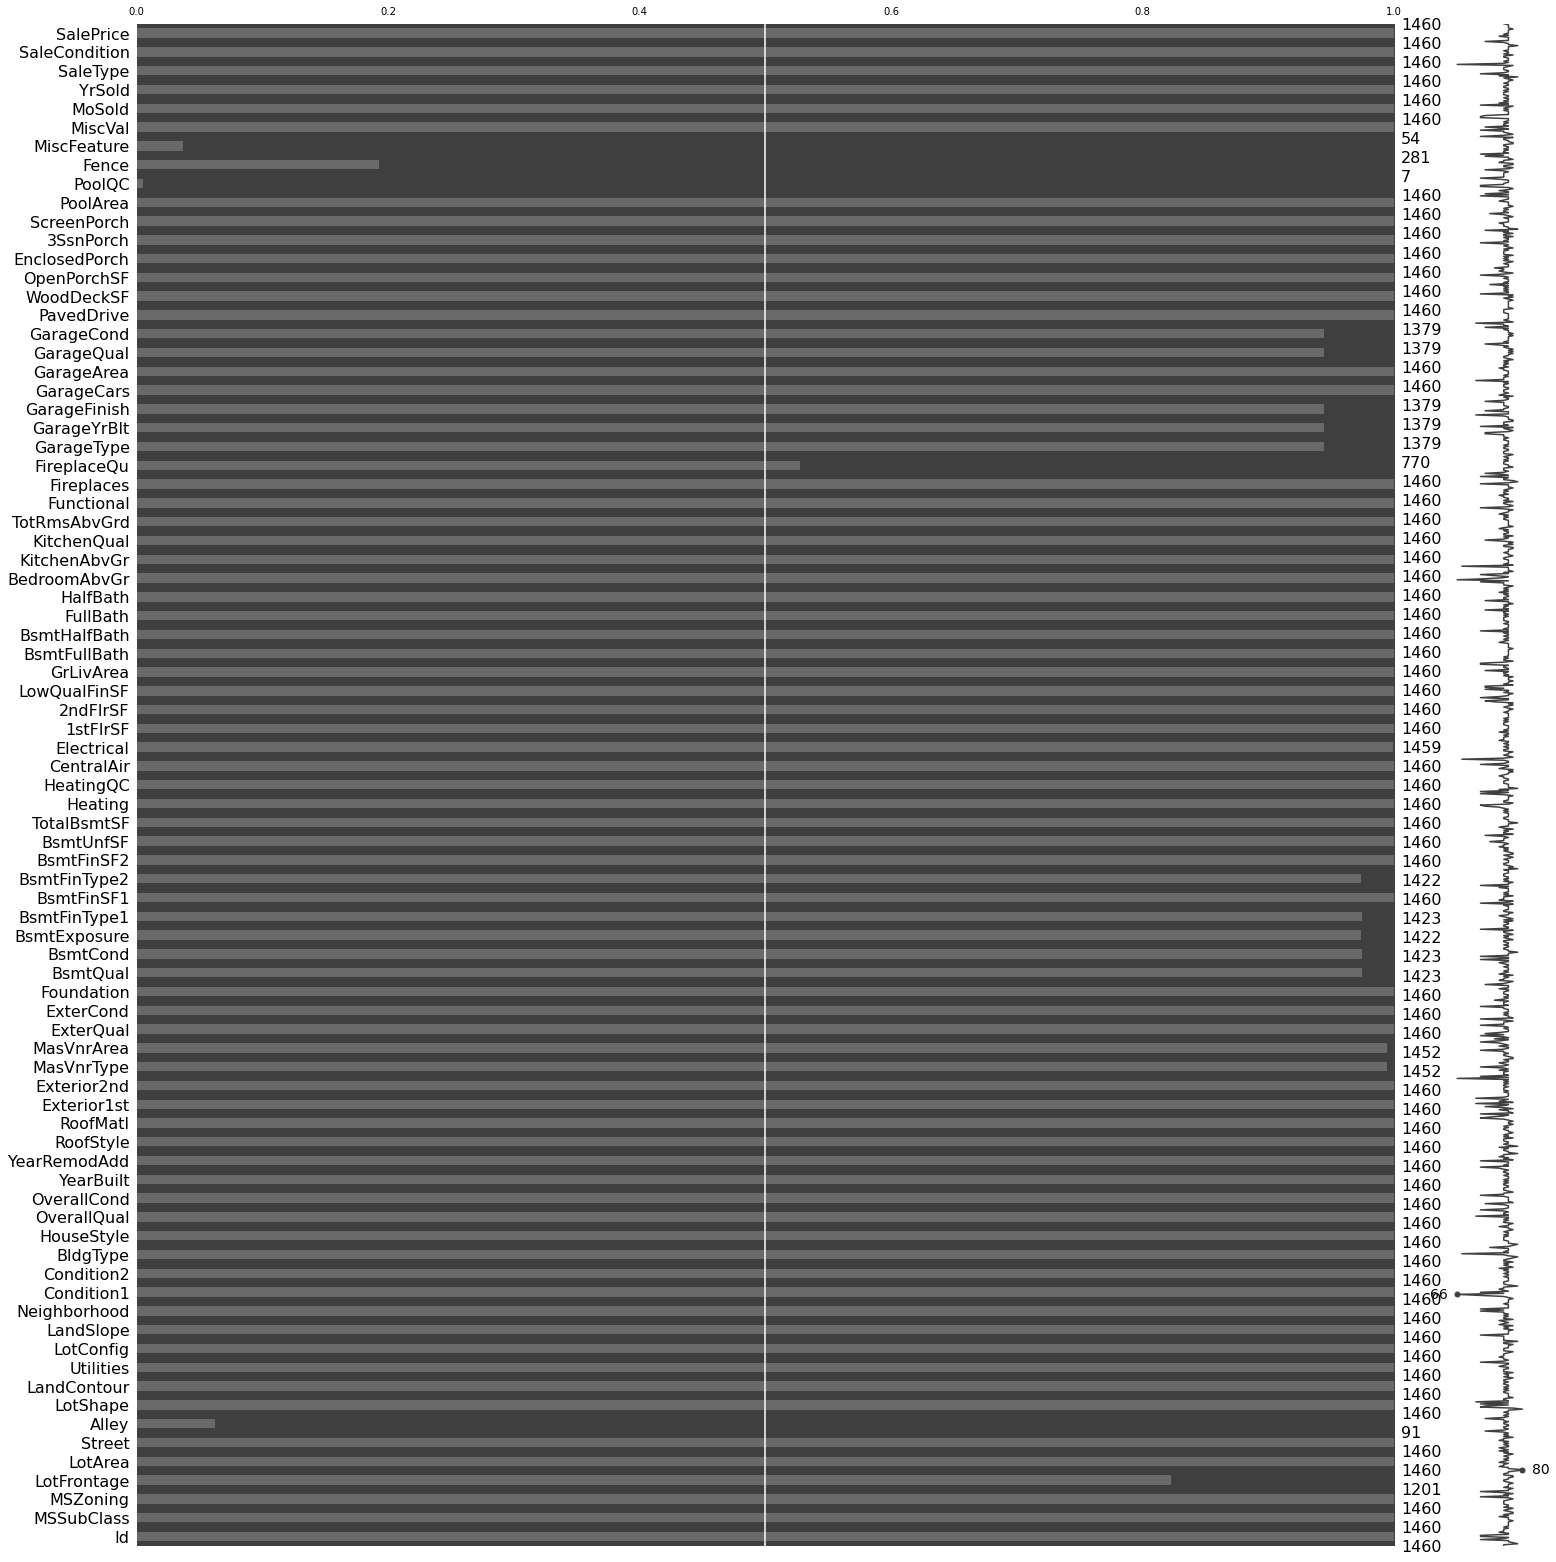

Id 欠損値: 0
MSSubClass 欠損値: 0
MSZoning 欠損値: 0
LotFrontage 欠損値: 259
LotArea 欠損値: 0
Street 欠損値: 0
Alley 欠損値: 1369
LotShape 欠損値: 0
LandContour 欠損値: 0
Utilities 欠損値: 0
LotConfig 欠損値: 0
LandSlope 欠損値: 0
Neighborhood 欠損値: 0
Condition1 欠損値: 0
Condition2 欠損値: 0
BldgType 欠損値: 0
HouseStyle 欠損値: 0
OverallQual 欠損値: 0
OverallCond 欠損値: 0
YearBuilt 欠損値: 0
YearRemodAdd 欠損値: 0
RoofStyle 欠損値: 0
RoofMatl 欠損値: 0
Exterior1st 欠損値: 0
Exterior2nd 欠損値: 0
MasVnrType 欠損値: 8
MasVnrArea 欠損値: 8
ExterQual 欠損値: 0
ExterCond 欠損値: 0
Foundation 欠損値: 0
BsmtQual 欠損値: 37
BsmtCond 欠損値: 37
BsmtExposure 欠損値: 38
BsmtFinType1 欠損値: 37
BsmtFinSF1 欠損値: 0
BsmtFinType2 欠損値: 38
BsmtFinSF2 欠損値: 0
BsmtUnfSF 欠損値: 0
TotalBsmtSF 欠損値: 0
Heating 欠損値: 0
HeatingQC 欠損値: 0
CentralAir 欠損値: 0
Electrical 欠損値: 1
1stFlrSF 欠損値: 0
2ndFlrSF 欠損値: 0
LowQualFinSF 欠損値: 0
GrLivArea 欠損値: 0
BsmtFullBath 欠損値: 0
BsmtHalfBath 欠損値: 0
FullBath 欠損値: 0
HalfBath 欠損値: 0
BedroomAbvGr 欠損値: 0
KitchenAbvGr 欠損値: 0
KitchenQual 欠損値: 0
TotRmsAbvGrd 欠損値: 0
Functional 欠損値: 0
Firep

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1455,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1456,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df_test)
msno.bar(df_test)
plt.show()

pd.set_option('display.max_columns', 20)

# 5つ以上欠損値がある特徴量（列）は削除する。
white_list = []
for key in df_test:
    null_num = df_test.loc[:, [key]].isnull().sum()[key]
    print(f"{key} 欠損値: {null_num}")
    if null_num < 5:
        white_list.append(key)
display(df_test.loc[:, white_list])

# 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
df_test = df_test.loc[:, white_list].dropna().reset_index(drop=True)
display(df_test)

### 【問題5】用語の調査
```
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度
歪度
```

##### 尖度 (せんど)
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと

##### 歪度 (わいど)
統計で、度数分布の平均値を中心とする非対称性の程度と大きさを表した量。ひずみ度。非対称度。

![hoge](https://academic-support.jp/wp-content/uploads/2020/03/Academic-Research-Support200318-1-700x392.jpg "hoge")
![hoge](https://bellcurve.jp/statistics/wp-body/wp-content/uploads/2018/01/795316b92fc766b0181f6fef074f03fa.png "hoge")


### 【問題6】分布の確認
```
seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
目的変数に対して対数変換を行う。
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。
このように加工することで予測時の精度を上げることができます。
```

In [1]:
# seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
import seaborn as sns
sns.displot(y)
plt.show()
sns.histplot(y)
plt.show()
display(y.skew())
display(y.kurt())

# 目的変数に対して対数変換を行う。
import numpy as np
y_log = np.log(y)

# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
sns.displot(y_log)
plt.show()
sns.histplot(y_log)
plt.show()
display(y_log.skew()) # 歪度
display(y_log.kurt())  # 尖度 

# 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。
#
# Answer: 偏りのある分布から、偏りが少ない正規分布に近くなる
#

NameError: name 'y' is not defined

### 【問題7】相関係数の確認
```
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》


重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。
```

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,...,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,...,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,...,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,...,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1455,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1456,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


,OverallQual,GrLivArea,GarageCars,FullBath,GarageArea,YearBuilt,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,YearRemodAdd
OverallQual,1.000000,0.593021,0.600991,0.551267,0.561980,0.573334,0.475933,0.537523,0.427720,0.551605
GrLivArea,0.593021,1.000000,0.467321,0.630283,0.468971,0.199286,0.566084,0.455001,0.825576,0.287677
GarageCars,0.600991,0.467321,1.000000,0.469619,0.882613,0.537866,0.439726,0.435279,0.362248,0.420573
FullBath,0.551267,0.630283,0.469619,1.000000,0.405944,0.467960,0.381438,0.324886,0.554759,0.438733
GarageArea,0.561980,0.468971,0.882613,0.405944,1.000000,0.479460,0.489741,0.486719,0.337915,0.372012
YearBuilt,0.573334,0.199286,0.537866,0.467960,0.479460,1.000000,0.283056,0.393159,0.095401,0.592512
1stFlrSF,0.475933,0.566084,0.439726,0.381438,0.489741,0.283056,1.000000,0.819393,0.409901,0.241344
TotalBsmtSF,0.537523,0.455001,0.435279,0.324886,0.486719,0.393159,0.819393,1.000000,0.286125,0.292546
TotRmsAbvGrd,0.427720,0.825576,0.362248,0.554759,0.337915,0.095401,0.409901,0.286125,1.000000,0.191603
YearRemodAdd,0.551605,0.287677,0.420573,0.438733,0.372012,0.592512,0.241344,0.292546,0.191603,1.000000


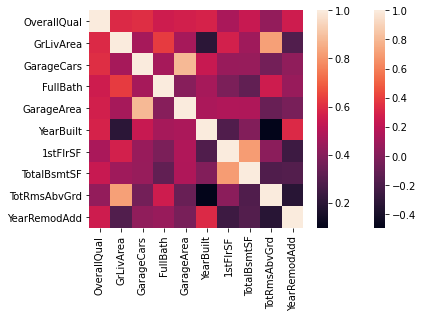

In [12]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
tmp_df = df_test
df_test_corr = tmp_df.corr()
sns.heatmap(df_test_corr)
display(df_test_corr)

# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
# df_test_corr = df_test_corr.sort_values('SalePrice', ascending=False)
# display(df_test_corr["SalePrice"][1:11])
cols = ["OverallQual", "GrLivArea", "GarageCars", "FullBath", "GarageArea", "YearBuilt", "1stFlrSF", "TotalBsmtSF", "TotRmsAbvGrd",  "YearRemodAdd"]
display(tmp_df)
tmp_df2 = tmp_df.loc[:, cols]
df_test_corr2 = tmp_df2.corr()
sns.heatmap(df_test_corr2)
display(df_test_corr2)

# 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
# OverallQual     0.717643 全体的な素材と仕上がりの品質
# GrLivArea       0.603814 地上(地下を含まない)の生活エリアすべて
# GarageCars      0.549325 車のガレージの容量
# FullBath        0.520031 地上のバスの広さ
# GarageArea      0.512382 ガレージの大きさ
# YearBuilt       0.481032 元の建設日
# 1stFlrSF        0.456223 1階平方フィート
# TotalBsmtSF     0.451369 地下室の総平方フィート
# TotRmsAbvGrd    0.438752 グレード以上の部屋の合計（バスルームは含まれません）
# YearRemodAdd    0.430795 改造日

# 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
# GarageArea       - GarageCars  0.882613
# TotRmsAbvGrd - GrLivArea    0.825576
# TotalBsmtSF     - 1stFlrSF       0.819393